In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#READ THE DATA FRAME
df = pd.read_csv ('./Data/attacks.csv', encoding='unicode_escape')


In [31]:
#Dates that are in the data frame
df.shape

(5091, 12)

In [3]:
#DROP THE NA

df.dropna(how='all',inplace=True)

In [4]:
#NUMBER OF SAMPLES WE WANT TO SHOW

df.sample(100)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6805,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011,2010.07.16.b,16-Jul-2010,2010.0,Provoked,SPAIN,Grand Canary Island,"Sardina del Norte, Gáldar",Swimming,male,M,...,Angel shark,"gáldahora, 7/16/2010",2010.07.16.b-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.07.16.b,2010.07.16.b,5292.0,NaN,NaN
614,2013.10.08,08-Oct-2013,2013.0,Unprovoked,AUSTRALIA,Western Australia,"Off Poison Creek, Cape Arid",Diving for Abalone,Greg Pickering,M,...,White shark,"Fox News, 10/9/2013",2013.10.08-Pickering.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.10.08,2013.10.08,5689.0,NaN,NaN
6682,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7270,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170,1958.01.09.R,Reported 09-Jan-1958,1958.0,Invalid,JAPAN,Ibaraki Prefecture,Mito,NaN,male,M,...,Shark involvement prior to death was not confi...,"Natal Mercury, 1/9/1958",1958.01.09.R-Japan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.01.09.R,1958.01.09.R,2133.0,NaN,NaN
954,2011.01.15,15-Jan-2011,2011.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,"Second Beach, Port St. John's",Surfing,Zama Ndamase,M,...,NaN,"The Mercury, 1/15/211",2011.01.15-Ndamase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.01.15,2011.01.15,5349.0,NaN,NaN
6506,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6869,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Drop nan
df.dropna(how='any',axis=1,thresh=12,inplace=True)

In [6]:
#COLUMNS THAT I WANT TO DROP

df.drop(['Case Number','Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order','Time','Species '],axis=1,inplace=True)

In [7]:
#COLUMNS THAT ARE IN THE DATA AFTER DROPPING  

df.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)'],
      dtype='object')

In [8]:
#Checking cumber of empty data cells
df.isnull().sum()

Date           2401
Year           2403
Type           2405
Country        2451
Area           2856
Location       2941
Activity       2945
Name           2611
Sex            2966
Age            5232
Injury         2429
Fatal (Y/N)    2940
dtype: int64

In [9]:
country1 = df['Country'].unique()
print(len (country1))

213


In [10]:

country_count = df['Country'].value_counts()
country_50 = country_count[country_count > 50]
print(country_50)

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
FIJI                  62
PHILIPPINES           61
REUNION               60
NEW CALEDONIA         53
Name: Country, dtype: int64


In [11]:
countries = country_count[country_count > 50].index


In [12]:
df_countries = df[df.Country.isin(countries)].copy()

In [13]:
df.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N


In [14]:
df_countries.to_csv(r'most_attacked_countries.csv', index = False)

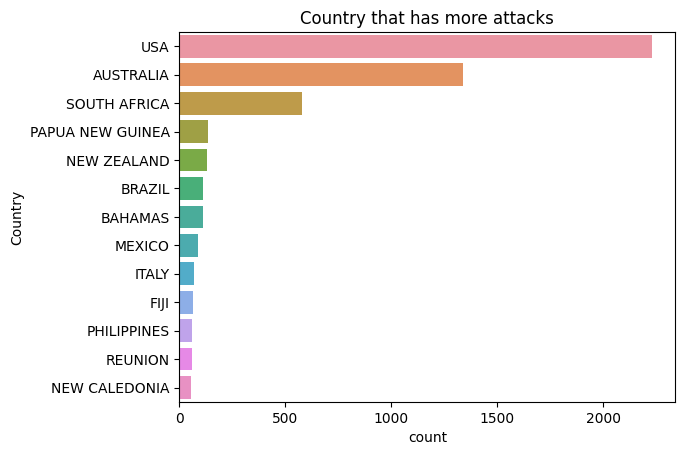

In [36]:
#Print the function
sns.countplot(y=df_countries["Country"], order = (df_countries['Country'].value_counts().index))
plt.title("Country that has more attacks")
plt.savefig("country_attacks.png")



In [16]:
#Sex without space

df["Sex "] = df["Sex "].str.strip().str.upper()

#df = df.drop(Sex , axis=1)







In [17]:
#FIlter the Year btw 2000-2010
Df=df[(df.Year >= 2000) & (df.Year <= 2010)]
 

In [18]:
Df

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N)
957,26-Dec-2010,2010.0,Unprovoked,USA,Hawaii,"Kahului, Maui",Body boarding,Vaun Stover-French,M,16,"Lacerations to his lower left leg, calf, foot ...",N
958,17-Dec-2010,2010.0,Unprovoked,FIJI,Vitu Levu,Sigatoka,Surfing,Jordi Gracia,M,NaN,Lacerations to foot,N
959,11-Dec-2010,2010.0,Unprovoked,USA,Hawaii,"Tavares Bay, Maui",Surfing,Andrew Wilson,M,46,Lacerations to right foot,N
960,05-Dec-2010,2010.0,Unprovoked,EGYPT,South Sinai Peninsula,"Middle Garden, Sharm el-Shiekh",Snorkeling,Renate Seiffert,F,70,FATAL,Y
961,Reported 03-Dec-2010,2010.0,Unprovoked,INDONESIA,Bali,Balian,Surfing,Wei Ong,M,NaN,Lacerations to right hand,N
...,...,...,...,...,...,...,...,...,...,...,...,...
2074,03-Feb-2000,2000.0,Unprovoked,NEW ZEALAND,South Island,Oreti Beach (reported as the 4th person bitten...,Surfing,Michael Petas,M,12,"No injury, wetsuit punctured",N
2075,01-Feb-2000,2000.0,Unprovoked,AUSTRALIA,South Australia,"Point Sinclair, Cactus Beach near Penong",Surfing,Anthony Hayes,M,26,Hand bitten,N
2076,Reported 28-Jan-2000,2000.0,Boat,REUNION,NaN,Saint Pierre,Canoe with 3 men onboard sank,Boulabhaï Ishmael,M,NaN,FATAL,Y
2077,05-Jan-2000,2000.0,Unprovoked,THAILAND,Phang nga Province,Phang nga Island,Diving,Stephan Kahl,M,35,FATAL,Y


In [19]:
#Group US Areas

areas=df[(df.Country == "USA")].groupby("Area").Area.count()
areas


Area
 New Jersey                  1
 North Carolina              1
Alabama                     15
Alaska                       1
CUBA                         1
California                 290
Connecticut                  6
Delaware                     7
East coast                   2
Florida                   1037
Florida                      1
Georgia                     14
Guam                         1
Hawaii                     298
Illinois                     1
Johnston Atoll               1
Kentucky                     1
Louisiana                   11
Maine                        1
Maryland                     7
Massachusetts               16
Midway Atoll                 1
Mississippi                  5
Missouri                     1
New Jersey                  52
New Mexico                   1
New York                    30
New York                     3
North & South Carolina       1
North Carolina             101
North Carolina               2
Oregon                      29
Pal

In [20]:
#Select less Areas
df_Area_20=areas[areas>20]
df_Area_20

Area
California         290
Florida           1037
Hawaii             298
New Jersey          52
New York            30
North Carolina     101
Oregon              29
South Carolina     159
Texas               73
Name: Area, dtype: int64

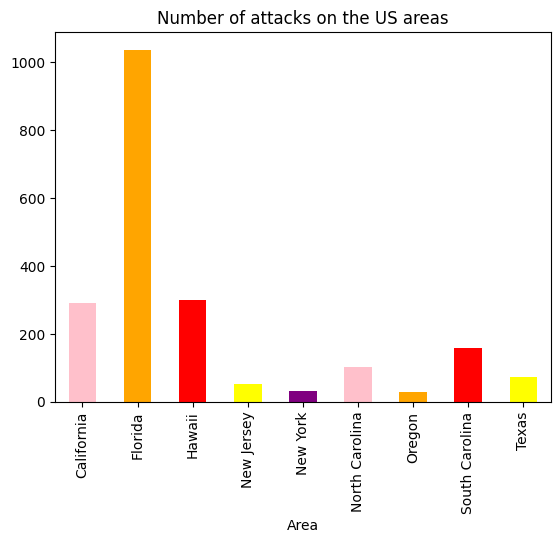

In [38]:
#Print 

df_Area_20.plot(kind='bar', color=['pink','orange','red','yellow','purple'])
plt.title("Number of attacks on the US areas")
plt.savefig("attacks_US.png")

In [22]:
unique_values=("Unique values: ", df['Type'].unique())
len(df['Type'].unique())
df['Type'].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

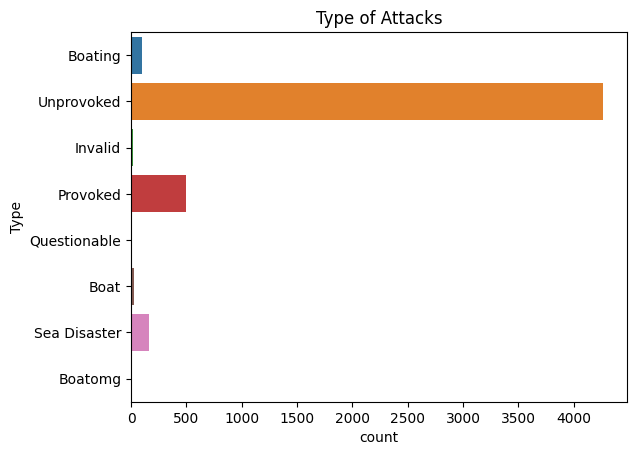

In [41]:
sns.countplot(y=df.Type)
plt.title("Type of Attacks")
plt.savefig("type_attacks.png")

In [24]:
###### hyphotesis 2

In [25]:
df["Sex "] = df["Sex "].str.strip().str.upper()

#df = df["Sex "]== M | (df["Sex "]== F)

In [26]:
df["Sex "].unique()

array(['F', 'M', nan, 'LLI', 'N', '.'], dtype=object)

In [27]:
df = df[((df["Fatal (Y/N)"]=="N") | (df["Fatal (Y/N)"]=="Y")) & ((df["Sex "]=="M") | (df["Sex "]=="F"))]

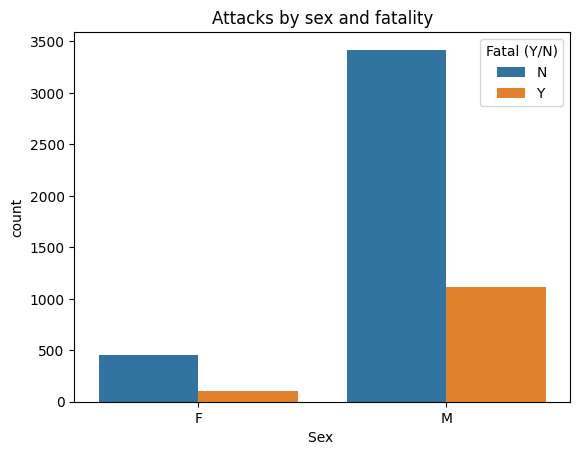

In [43]:
sns.countplot(data=df, x='Sex ' , hue='Fatal (Y/N)')
dtype={'caption' : str}
plt.title("Attacks by sex and fatality")
plt.savefig("sex_fatality.png")

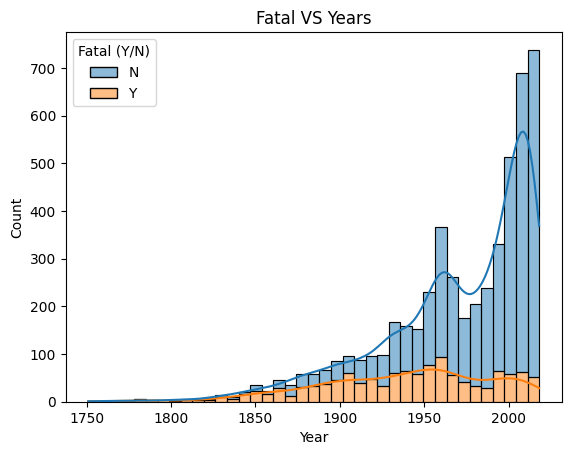

In [44]:
df = df[(df["Year"]>=1750)]
df["Year"] = df[["Year"]].astype(int)
sns.histplot(data=df, x="Year", hue="Fatal (Y/N)", multiple="stack", kde=True,)            
plt.title("Fatal VS Years")
plt.savefig("year_fatal.png")







